# Predicting House Prices with Regression using Tensorflow

For this project, I have worked on evaluating price of houses given the following features:

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude

Note: This notebook uses python3 and the following packages: tensorflow 2.0, pandas, matplotlib, scikit-learn.

In [3]:
#importing libraries and helper functions
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print('Libraries imported.')

Libraries imported.


In [4]:
#importing data
column_names = ['srno', 'year', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
df = pd.read_csv('data.csv', names = column_names) 
df.head()

,srno,year,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [5]:
#checking for missing data
df.isna().sum()

srno         0
year         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [6]:
#normalizing the data
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,year,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [7]:
#to convert normalized predicted values to orignial
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

14263


In [8]:
#features
X = df_norm.iloc[:, :6]
X.head()

,year,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [9]:
#label
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [10]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


In [11]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.05, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4750, 6)
y_train shape:  (4750,)
X_test shape:  (250, 6)
y_test shape:  (250,)


In [14]:
#model creation
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adam'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [15]:
#training the model
es = EarlyStopping(monitor='val_loss', patience = 5)

model = get_model()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000,
    callbacks = [es]
)

Epoch 1/1000
149/149 [==============================] - 1s 6ms/step - loss: 0.7916 - val_loss: 0.5292
Epoch 2/1000
149/149 [==============================] - 1s 4ms/step - loss: 0.4977 - val_loss: 0.3711
Epoch 3/1000
149/149 [==============================] - 1s 7ms/step - loss: 0.2642 - val_loss: 0.2070
Epoch 4/1000
149/149 [==============================] - 1s 4ms/step - loss: 0.1872 - val_loss: 0.1804
Epoch 5/1000
149/149 [==============================] - 1s 7ms/step - loss: 0.1735 - val_loss: 0.1652
Epoch 6/1000
149/149 [==============================] - 1s 6ms/step - loss: 0.1675 - val_loss: 0.1626
Epoch 7/1000
149/149 [==============================] - 1s 4ms/step - loss: 0.1640 - val_loss: 0.1614
Epoch 8/1000
149/149 [==============================] - 1s 5ms/step - loss: 0.1624 - val_loss: 0.1601
Epoch 9/1000
149/149 [==============================] - 1s 4ms/step - loss: 0.1602 - val_loss: 0.1544
Epoch 10/1000
149/149 [==============================] - 1s 8ms/step - loss: 0.158

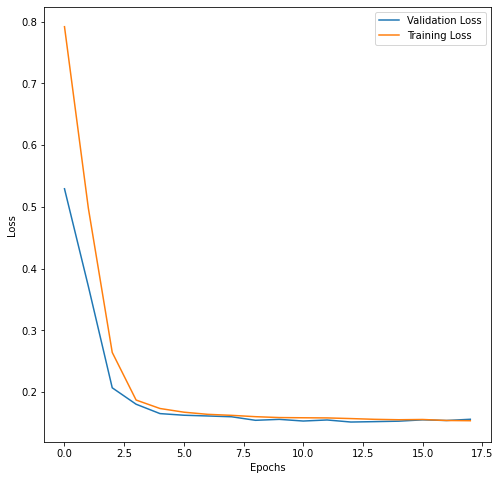

In [16]:
#plot training and validation loss
plot_loss(history)

C:\Users\Saloni Das\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


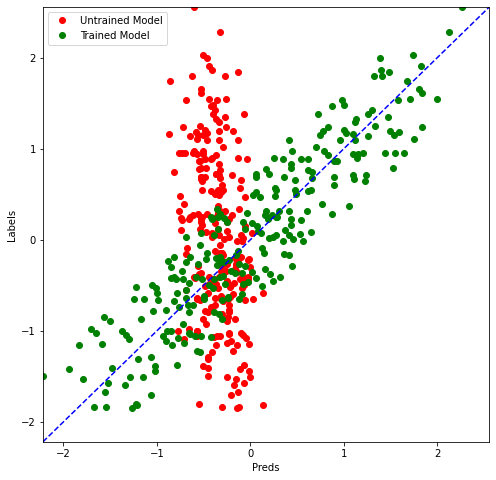

In [17]:
#predictions
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

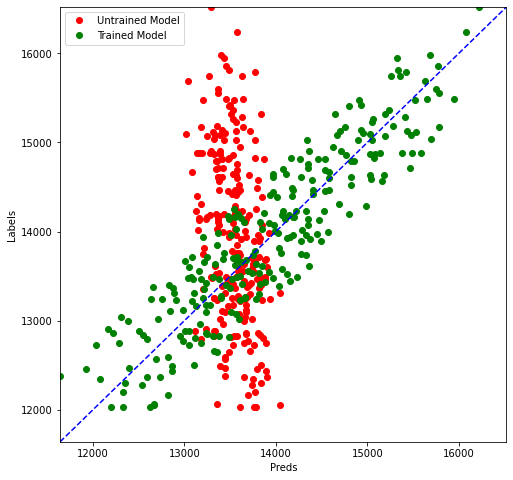

In [18]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_on_untrained, price_on_trained, price_y_test)